In [1]:
import pandas as pd
from functions.analysis_and_plots import (preprocessing, train_test_split, 
 exp_smoothing_model,  rms_error_calc, load_model, predict_with_model, cumulative_addition, get_tables_from_sheet,create_df,sum_columns,subtract_dataframes, Simulations, update_spending_df,plot_expense_pie_avg_percentage)

In [2]:




# Load the Excel file
file_path = 'CFF.xlsx'
sheet_name = 'CFF'

tables = get_tables_from_sheet(file_path, sheet_name)


revenus = tables[0]
depenses = tables[2]

index_depenses = depenses["Date"][1:]


index_revenus = ["salaire"]









In [3]:
revenus

,Date,2024-12-31 00:00:00,2024-12-24 00:00:00,2024-12-17 00:00:00,2024-12-10 00:00:00,2024-12-03 00:00:00,2024-11-26 00:00:00,2024-11-19 00:00:00,2024-11-12 00:00:00,2024-11-05 00:00:00,...,2024-09-10 00:00:00,2024-09-03 00:00:00,2024-08-27 00:00:00,2024-08-20 00:00:00,2024-08-13 00:00:00,2024-08-06 00:00:00,2024-07-30 00:00:00,2024-07-23 00:00:00,2024-07-16 00:00:00,2024-07-09 00:00:00
0,REVENUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Salaire,3500.0,NaN,NaN,NaN,3500.0,NaN,NaN,NaN,3500.0,...,3500.0,NaN,NaN,NaN,3500.0,NaN,NaN,NaN,NaN,NaN
2,Vente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Autres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
depenses

,Date,2024-12-31 00:00:00,2024-12-24 00:00:00,2024-12-17 00:00:00,2024-12-10 00:00:00,2024-12-03 00:00:00,2024-11-26 00:00:00,2024-11-19 00:00:00,2024-11-12 00:00:00,2024-11-05 00:00:00,...,2024-09-10 00:00:00,2024-09-03 00:00:00,2024-08-27 00:00:00,2024-08-20 00:00:00,2024-08-13 00:00:00,2024-08-06 00:00:00,2024-07-30 00:00:00,2024-07-23 00:00:00,2024-07-16 00:00:00,2024-07-09 00:00:00
7,DEPENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Loyer,1200.00,NaN,NaN,NaN,1200.0,NaN,NaN,NaN,1200.0,...,1200.0,NaN,NaN,NaN,1200.0,NaN,NaN,NaN,1200.0,NaN
9,Restaurant,60.00,60.0,NaN,70.0,70.0,60.00,NaN,70.0,70.0,...,70.0,70.0,NaN,NaN,70.0,70.0,NaN,NaN,70.0,70.0
10,Telephone,NaN,30.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,NaN,30.0,NaN,NaN,NaN,30.0,NaN,NaN
11,Shopping,210.00,180.0,120.0,130.0,200.0,140.00,100.0,120.0,180.0,...,120.0,180.0,210.00,100.0,120.0,180.0,210.00,100.0,120.0,180.0
12,Coffee,5.00,5.0,NaN,NaN,5.0,NaN,5.0,NaN,NaN,...,NaN,NaN,5.00,5.0,NaN,NaN,5.00,5.0,NaN,NaN
13,Transports,NaN,50.0,50.0,50.0,50.0,50.00,50.0,50.0,50.0,...,50.0,100.0,NaN,NaN,50.0,100.0,NaN,NaN,50.0,100.0
14,Electricte,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,60.0,...,NaN,60.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN,60.0
15,Netflix,15.99,NaN,NaN,NaN,NaN,15.99,NaN,NaN,NaN,...,NaN,NaN,15.99,NaN,NaN,NaN,15.99,NaN,NaN,NaN
16,Divers Amazon,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,120.0,NaN,NaN,NaN,120.0,NaN,NaN


In [5]:
df_revenus = preprocessing(revenus)
df_depense = preprocessing(depenses)


In [6]:
df_revenus

,2024-12-31,2024-12-24,2024-12-17,2024-12-10,2024-12-03,2024-11-26,2024-11-19,2024-11-12,2024-11-05,2024-10-29,...,2024-09-10,2024-09-03,2024-08-27,2024-08-20,2024-08-13,2024-08-06,2024-07-30,2024-07-23,2024-07-16,2024-07-09
1,3500.0,,,,3500.0,,,,3500.0,,...,3500.0,,,,3500.0,,,,,


In [7]:
df_depense

,2024-12-31,2024-12-24,2024-12-17,2024-12-10,2024-12-03,2024-11-26,2024-11-19,2024-11-12,2024-11-05,2024-10-29,...,2024-09-10,2024-09-03,2024-08-27,2024-08-20,2024-08-13,2024-08-06,2024-07-30,2024-07-23,2024-07-16,2024-07-09
8,1200.0,,,,1200.0,,,,1200.0,,...,1200.0,,,,1200.0,,,,1200.0,
9,60.0,60.0,,70.0,70.0,60.0,,70.0,70.0,60.0,...,70.0,70.0,,,70.0,70.0,,,70.0,70.0
10,,30.0,,,,,30.0,,,,...,,,,30.0,,,,30.0,,
11,210.0,180.0,120.0,130.0,200.0,140.0,100.0,120.0,180.0,290.0,...,120.0,180.0,210.0,100.0,120.0,180.0,210.0,100.0,120.0,180.0
12,5.0,5.0,,,5.0,,5.0,,,5.0,...,,,5.0,5.0,,,5.0,5.0,,
13,,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,100.0,,,50.0,100.0,,,50.0,100.0
14,,,,60.0,,,,,60.0,,...,,60.0,,,,60.0,,,,60.0
15,15.99,,,,,15.99,,,,15.99,...,,,15.99,,,,15.99,,,
16,,120.0,,,,,,,,,...,,,,120.0,,,,120.0,,
17,,,,40.0,,,,40.0,,,...,40.0,,,,40.0,,,,40.0,


In [8]:
dataframe_revenus = create_df(df_revenus,"REVENUS",index_revenus)
dataframe_depenses = create_df(df_depense,"DEPENSES",index_depenses)


In [9]:
dataframe_revenus

,2024-12-31,2024-12-24,2024-12-17,2024-12-10,2024-12-03,2024-11-26,2024-11-19,2024-11-12,2024-11-05,2024-10-29,...,2024-09-10,2024-09-03,2024-08-27,2024-08-20,2024-08-13,2024-08-06,2024-07-30,2024-07-23,2024-07-16,2024-07-09
REVENUS,,,,,,,,,,,,,,,,,,,,,
salaire,3500.0,,,,3500.0,,,,3500.0,,...,3500.0,,,,3500.0,,,,,


In [10]:
dataframe_depenses

,2024-12-31,2024-12-24,2024-12-17,2024-12-10,2024-12-03,2024-11-26,2024-11-19,2024-11-12,2024-11-05,2024-10-29,...,2024-09-10,2024-09-03,2024-08-27,2024-08-20,2024-08-13,2024-08-06,2024-07-30,2024-07-23,2024-07-16,2024-07-09
DEPENSES,,,,,,,,,,,,,,,,,,,,,
Loyer,1200.0,,,,1200.0,,,,1200.0,,...,1200.0,,,,1200.0,,,,1200.0,
Restaurant,60.0,60.0,,70.0,70.0,60.0,,70.0,70.0,60.0,...,70.0,70.0,,,70.0,70.0,,,70.0,70.0
Telephone,,30.0,,,,,30.0,,,,...,,,,30.0,,,,30.0,,
Shopping,210.0,180.0,120.0,130.0,200.0,140.0,100.0,120.0,180.0,290.0,...,120.0,180.0,210.0,100.0,120.0,180.0,210.0,100.0,120.0,180.0
Coffee,5.0,5.0,,,5.0,,5.0,,,5.0,...,,,5.0,5.0,,,5.0,5.0,,
Transports,,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,100.0,,,50.0,100.0,,,50.0,100.0
Electricte,,,,60.0,,,,,60.0,,...,,60.0,,,,60.0,,,,60.0
Netflix,15.99,,,,,15.99,,,,15.99,...,,,15.99,,,,15.99,,,
Divers Amazon,,120.0,,,,,,,,,...,,,,120.0,,,,120.0,,


In [11]:

total_depenses =  sum_columns(dataframe_depenses)
print(total_depenses)


          Week  Balance
0   2024-12-31  1490.99
1   2024-12-24   445.00
2   2024-12-17   295.00
3   2024-12-10   350.00
4   2024-12-03  1555.00
5   2024-11-26   265.99
6   2024-11-19   310.00
7   2024-11-12   280.00
8   2024-11-05  1590.00
9   2024-10-29   420.99
10  2024-10-22   335.00
11  2024-10-15   325.00
12  2024-10-08  1640.00
13  2024-10-01   230.99
14  2024-09-24   420.99
15  2024-09-17   335.00
16  2024-09-10  1525.00
17  2024-09-03   440.00
18  2024-08-27   230.99
19  2024-08-20   335.00
20  2024-08-13  1525.00
21  2024-08-06   440.00
22  2024-07-30   230.99
23  2024-07-23   335.00
24  2024-07-16  1525.00
25  2024-07-09   440.00


In [12]:
total_revenus = sum_columns(dataframe_revenus)
print(total_revenus)

          Week  Balance
0   2024-12-31   3500.0
1   2024-12-24      0.0
2   2024-12-17      0.0
3   2024-12-10      0.0
4   2024-12-03   3500.0
5   2024-11-26      0.0
6   2024-11-19      0.0
7   2024-11-12      0.0
8   2024-11-05   3500.0
9   2024-10-29      0.0
10  2024-10-22      0.0
11  2024-10-15      0.0
12  2024-10-08   3500.0
13  2024-10-01      0.0
14  2024-09-24      0.0
15  2024-09-17      0.0
16  2024-09-10   3500.0
17  2024-09-03      0.0
18  2024-08-27      0.0
19  2024-08-20      0.0
20  2024-08-13   3500.0
21  2024-08-06      0.0
22  2024-07-30      0.0
23  2024-07-23      0.0
24  2024-07-16      0.0
25  2024-07-09      0.0


In [13]:
df_main = subtract_dataframes(total_revenus,total_depenses)
print(df_main)

          Week  Balance
0   2024-12-31  2009.01
1   2024-12-24  -445.00
2   2024-12-17  -295.00
3   2024-12-10  -350.00
4   2024-12-03  1945.00
5   2024-11-26  -265.99
6   2024-11-19  -310.00
7   2024-11-12  -280.00
8   2024-11-05  1910.00
9   2024-10-29  -420.99
10  2024-10-22  -335.00
11  2024-10-15  -325.00
12  2024-10-08  1860.00
13  2024-10-01  -230.99
14  2024-09-24  -420.99
15  2024-09-17  -335.00
16  2024-09-10  1975.00
17  2024-09-03  -440.00
18  2024-08-27  -230.99
19  2024-08-20  -335.00
20  2024-08-13  1975.00
21  2024-08-06  -440.00
22  2024-07-30  -230.99
23  2024-07-23  -335.00
24  2024-07-16 -1525.00
25  2024-07-09  -440.00


In [14]:
train_data, test_data = train_test_split(df_main, split_index=24)

**Triple explonential smoohting model fit**

In [15]:
preds_triple = exp_smoothing_model(train_data, test_data, model='triple')

In [16]:
triple_rms = rms_error_calc(test_data, preds_triple)
print(" Root Mean Square Error of triple exponential method is:", triple_rms)

 Root Mean Square Error of triple exponential method is: 2444.06173463665


In [19]:
# Charger le modèle pré-entraîné
loaded_model = load_model(filename='trained_exp_smoothing_model.pkl')



# Prédire sur plusieurs semaines pour le nouveau client
predictions = predict_with_model(loaded_model, df_main, weeks_ahead=4)

flux_forecast = []

flux_forecast = predictions['Predicted_Balance']


forecast_balance = cumulative_addition(flux_forecast,1564.01)
solde_before = cumulative_addition(df_main['Balance'],1564.01)
solde_before = ["{:.2f}".format(num) for num in solde_before]
forecast_balance = ["{:.2f}".format(num) for num in forecast_balance]



#print(forecast_balance)
#print(solde_before)

# Créer le tableau à deux lignes
result = [solde_before + [''] * (len(forecast_balance) - 1), [''] * len(solde_before) + forecast_balance]
print(result)

[['3573.02', '3128.02', '2833.02', '2483.02', '4428.02', '4162.03', '3852.03', '3572.03', '5482.03', '5061.04', '4726.04', '4401.04', '6261.04', '6030.05', '5609.06', '5274.06', '7249.06', '6809.06', '6578.07', '6243.07', '8218.07', '7778.07', '7547.08', '7212.08', '5687.08', '5247.08', '', '', ''], ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '3493.77', '3161.01', '2798.20', '2454.51']]


In [20]:
data = [
     {"Description": "adidas", "Category" : "clothes" ,"Amount": 100,"Date": "2025-02-28"},
     {"Description": "adidas", "Category" : "clothes","Amount": 200, "Date": "2025-01-24" },
]
initial_balance = 1564.01
model_filename = 'trained_exp_smoothing_model.pkl'
simumulation_result = Simulations(data, initial_balance, model_filename,df_main)
print(simumulation_result)

['3793.77', '3461.01', '3098.20', '2754.51', '4713.25', '4352.64', '4077.15']


In [21]:
from datetime import datetime

dataframe_depenses = update_spending_df(dataframe_depenses, 'Shopping', 100, '2025-03-01')
dataframe_depenses = update_spending_df(dataframe_depenses, 'Shopping', 150, '2025-05-01')


dataframe_depenses.columns = [col.date() if isinstance(col, datetime) else col for col in dataframe_depenses.columns]


# Display the updated DataFrame
print(dataframe_depenses)


                 2024-07-09  2024-07-16  2024-07-21  2024-07-23  2024-07-28  \
DEPENSES                                                                      
Loyer                   0.0      1200.0           0         0.0           0   
Restaurant             70.0        70.0           0         0.0           0   
Telephone               0.0         0.0           0        30.0           0   
Shopping              180.0       120.0           0       100.0           0   
Coffee                  0.0         0.0           0         5.0           0   
Transports            100.0        50.0           0         0.0           0   
Electricte             60.0         0.0           0         0.0           0   
Netflix                 0.0         0.0           0         0.0           0   
Divers Amazon           0.0         0.0           0       120.0           0   
Salle de sport          0.0        40.0           0         0.0           0   
Divers                  0.0        45.0           0 

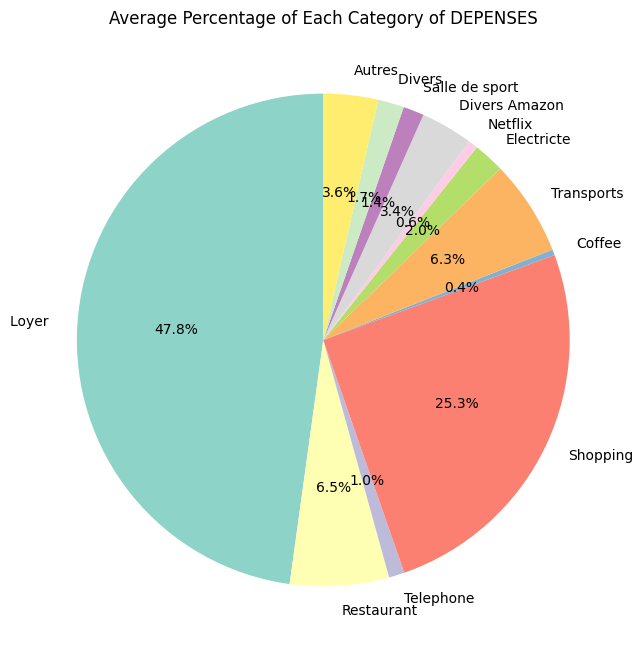

In [21]:






plot_expense_pie_avg_percentage(dataframe_depenses)

  